# Data Access Notebook

In this notebook, we’ll be walking through how to retrieve climate data from `climakitae` through a series of real-world analyses. These include visualizing time-series temperature data, retrieving warming-level data, and calculating 1-in-X metrics—all designed to help you get familiar with how `climakitae` works in practice.

**Intended Application:** As a user, I want to **<span style="color:red">understand how I can use `climakitae` for my own climate analyses.</span>**

**Runtime**: ~20 min. to run through the whole notebook. Modifications to different queries may increase/decrease the overall runtime.

In [1]:
import matplotlib.pyplot as plt
import climakitae as ck 

# High-level details 
The AE data catalog includes a wide range of climate datasets. Our helper library, `climakitae`, is designed to make accessing and retrieving this data intuitive, while also simplifying downstream climate and statistical analyses by applying key data transformations during retrieval. To get started, you'll need to make some selections to your climate variable, data resolution, location settings, and several other options.<br>

**<span style="color:darkblue">`ClimateData` is the main object we'll be using to interface with `climakitae`, consolidating ALL data access and processing functionality into one single entry point. We'll be using this class extensively throughout this notebook.</span>**

# Data Selection Options

There are several methods to explore all the available data options in `climakitae`. You can get a comprehensive overview or explore step by step. The example below will show how you can instantiate the object and list how much verbosity of output you'd like from the `ClimateData` in `climakitae`.

### Verbosity
You can also choose the level of output `ClimateData` will provide for you. <br>
`-2` : errors only  
`-1` : warnings and errors  
`0`  : info, warnings, and errors (default)  
`1`  : debug, info, warnings, and errors (developers or debugging only, not recommended)

In [2]:
# Initialize the interface
cd = ck.ClimateData(verbosity=-1) # only give warnings and errors

In [12]:
pressure_data = (cd
    .catalog("cadcat")
    .variable("psfc")
    .activity_id("WRF")
    .institution_id("UCLA")
    .grid_label("d03")
    .table_id('1hr')
    .processes({
        "warming_level": {
            "warming_levels": [2.0]
        },
        "clip": "Southern California Edison",
        "convert_units": "mb"
    }).get()
)


2026-01-05 19:18:05 - climakitae.new_core.processors.filter_unadjusted_models - WARNING - 

Your query selected models that do not have a-priori bias adjustment. 
These models have been removed from the returned query. 
To include them, please add the following processor to your query: 
ClimateData().processes('filter_unadjusted_models': 'no')



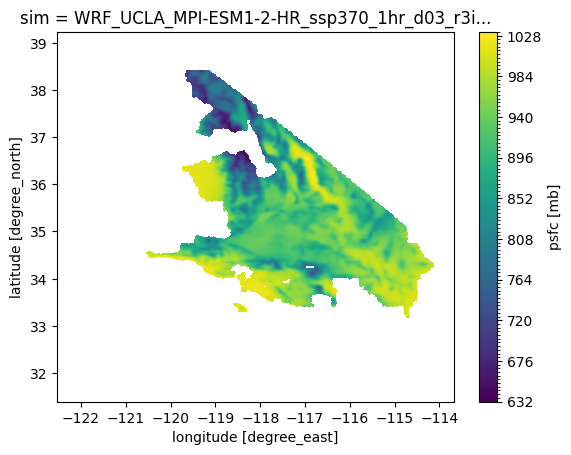

In [14]:

pressure_data.isel(warming_level=0, sim=0, time_delta=10).psfc.plot.contourf(x='lon', y='lat', levels=100)

In [15]:
cd.show_variable_options()

2026-01-05 19:23:39 - climakitae.new_core.user_interface - INFO - Variables:
2026-01-05 19:23:39 - climakitae.new_core.user_interface - INFO - ----------
2026-01-05 19:23:39 - climakitae.new_core.user_interface - INFO - cape:                    Convective Available Potential Energy
2026-01-05 19:23:39 - climakitae.new_core.user_interface - INFO - cf:                      Capacity factor
2026-01-05 19:23:39 - climakitae.new_core.user_interface - INFO - cin:                     Convective Inhibition
2026-01-05 19:23:39 - climakitae.new_core.user_interface - INFO - dew_point:               No description available
2026-01-05 19:23:39 - climakitae.new_core.user_interface - INFO - effective_temp_index:    No description available
2026-01-05 19:23:39 - climakitae.new_core.user_interface - INFO - etrans_sfc:              Evapotranspiration
2026-01-05 19:23:39 - climakitae.new_core.user_interface - INFO - evap_sfc:                Evaporation
2026-01-05 19:23:39 - climakitae.new_core.user_inter

In [3]:
# Get a comprehensive overview of all available options
cd.show_all_options()

# Or you can see specific categories by uncommenting any of the lines below:
# cd.show_catalog_options()
# cd.show_activity_id_options()
# cd.show_institution_id_options()
# cd.show_source_id_options()
# cd.show_experiment_id_options()
# cd.show_table_id_options()
# cd.show_grid_label_options()
# cd.show_variable_options()
# cd.show_installation_options()
# cd.show_processors()
# cd.show_boundary_options()
# cd.show_station_options()

### This will be explored in more detail in the next section

2026-01-02 23:11:25 - climakitae.new_core.user_interface - INFO - ========================================================
2026-01-02 23:11:25 - climakitae.new_core.user_interface - INFO - CAL ADAPT DATA -- ALL AVAILABLE OPTIONS USING CLIMAKITAE
2026-01-02 23:11:25 - climakitae.new_core.user_interface - INFO - ========================================================
2026-01-02 23:11:25 - climakitae.new_core.user_interface - INFO - catalog options (Cloud data collections):
2026-01-02 23:11:25 - climakitae.new_core.user_interface - INFO - -----------------------------------------
2026-01-02 23:11:25 - climakitae.new_core.user_interface - INFO - cadcat
2026-01-02 23:11:25 - climakitae.new_core.user_interface - INFO - hdp
2026-01-02 23:11:25 - climakitae.new_core.user_interface - INFO - renewable energy generation
2026-01-02 23:11:25 - climakitae.new_core.user_interface - INFO - 

2026-01-02 23:11:25 - climakitae.new_core.user_interface - INFO - activity_id options (Downscaling methods):
2

## Data Selection Options for a particular set of inputs
You can explore options step by step, building your query as you learn about available data.

In [4]:
# Explore options step by step
print("=== Available Catalogs ===")
cd.reset()
cd.show_catalog_options()

print("\n=== Choose 'renewable energy generation' catalog and explore installations ===")
renewables_explorer = cd.catalog("renewable energy generation")
renewables_explorer.show_installation_options()

print("\n=== Choose 'pv_utility' installation and explore variables ===")
pv_explorer = renewables_explorer.installation("pv_utility")
pv_explorer.show_variable_options()

=== Available Catalogs ===
2026-01-02 23:11:25 - climakitae.new_core.user_interface - INFO - catalog options (Cloud data collections):
2026-01-02 23:11:25 - climakitae.new_core.user_interface - INFO - -----------------------------------------
2026-01-02 23:11:25 - climakitae.new_core.user_interface - INFO - cadcat
2026-01-02 23:11:25 - climakitae.new_core.user_interface - INFO - hdp
2026-01-02 23:11:25 - climakitae.new_core.user_interface - INFO - renewable energy generation
2026-01-02 23:11:25 - climakitae.new_core.user_interface - INFO - 


=== Choose 'renewable energy generation' catalog and explore installations ===
2026-01-02 23:11:25 - climakitae.new_core.user_interface - INFO - installation options (Renewable energy generation types):
2026-01-02 23:11:25 - climakitae.new_core.user_interface - INFO - ---------------------------------------------------------
2026-01-02 23:11:25 - climakitae.new_core.user_interface - INFO - pv_distributed
2026-01-02 23:11:25 - climakitae.new_core.u

You can also explore the climate data catalog:

In [5]:
print("=== Climate Data Catalog ===")
cd.reset()
data_explorer = cd.catalog("cadcat")

print("\n=== WRF (Dynamical Downscaling) Variables ===")
wrf_explorer = data_explorer.activity_id("WRF")
wrf_explorer.show_variable_options(show_n=15)

=== Climate Data Catalog ===

=== WRF (Dynamical Downscaling) Variables ===
2026-01-02 23:11:25 - climakitae.new_core.user_interface - INFO - Variables (constrained by current query)::
2026-01-02 23:11:25 - climakitae.new_core.user_interface - INFO - ------------------------------------------
2026-01-02 23:11:25 - climakitae.new_core.user_interface - INFO - Showing 15 of 58 total options
2026-01-02 23:11:25 - climakitae.new_core.user_interface - INFO - cape:                    Convective Available Potential Energy
2026-01-02 23:11:25 - climakitae.new_core.user_interface - INFO - cin:                     Convective Inhibition
2026-01-02 23:11:25 - climakitae.new_core.user_interface - INFO - dew_point:               No description available
2026-01-02 23:11:25 - climakitae.new_core.user_interface - INFO - effective_temp_index:    No description available
2026-01-02 23:11:25 - climakitae.new_core.user_interface - INFO - etrans_sfc:              Evapotranspiration
2026-01-02 23:11:25 - cli

At any point in building your query, you can check what parameters you've set:

In [6]:
# Build a partial query and check its state
partial_query = (cd
    .catalog("cadcat")
    .activity_id("WRF")
    .experiment_id("historical")
    .table_id("mon")
    .grid_label("d01")
)

# Check what we've built so far
partial_query.show_query()

# # See what variable options are still available
print("\nAvailable variables for this query:")
partial_query.show_variable_options(show_n=5)

2026-01-02 23:11:25 - climakitae.new_core.user_interface - INFO - Current Query:
2026-01-02 23:11:25 - climakitae.new_core.user_interface - INFO - --------------
2026-01-02 23:11:25 - climakitae.new_core.user_interface - INFO - catalog: cadcat
2026-01-02 23:11:25 - climakitae.new_core.user_interface - INFO - installation: UNSET
2026-01-02 23:11:25 - climakitae.new_core.user_interface - INFO - activity_id: WRF
2026-01-02 23:11:25 - climakitae.new_core.user_interface - INFO - institution_id: UNSET
2026-01-02 23:11:25 - climakitae.new_core.user_interface - INFO - source_id: UNSET
2026-01-02 23:11:25 - climakitae.new_core.user_interface - INFO - experiment_id: ['historical']
2026-01-02 23:11:25 - climakitae.new_core.user_interface - INFO - table_id: mon
2026-01-02 23:11:25 - climakitae.new_core.user_interface - INFO - grid_label: d01
2026-01-02 23:11:25 - climakitae.new_core.user_interface - INFO - variable_id: UNSET
2026-01-02 23:11:25 - climakitae.new_core.user_interface - INFO - station

You can additionally make queries as chained commands (our recommended approach) or as dictionaries, like below:

In [7]:
# RECOMMENDED: Chained command example (we'll go through what the parameters mean further down in the notebook).
cd.reset()
climate_data = (cd
    .catalog("cadcat")       # Catalog name
    .activity_id("WRF")      # Downscaling method
    .experiment_id("ssp370") # SSP scenario
    .institution_id("UCLA")  # Institution name
    .table_id("mon")         # Data frequency
    .grid_label("d02")       # Grid resolution
    .variable("t2")          # Variable name
).get()
climate_data

2026-01-02 23:11:26 - climakitae.new_core.processors.filter_unadjusted_models - WARNING - 

Your query selected models that do not have a-priori bias adjustment. 
These models have been removed from the returned query. 
To include them, please add the following processor to your query: 
ClimateData().processes('filter_unadjusted_models': 'no')

2026-01-02 23:11:26 - climakitae.new_core.processors.processor_utils - WARNING - 

No historical data found for WRF.UCLA.MIROC6.ssp370.mon.d02 with key WRF.UCLA.MIROC6.historical.mon.d02. 
Historical data is required for time domain extension. 
Keeping original SSP data without historical extension.

2026-01-02 23:11:26 - climakitae.new_core.processors.processor_utils - WARNING - 

No historical data found for WRF.UCLA.TaiESM1.ssp370.mon.d02 with key WRF.UCLA.TaiESM1.historical.mon.d02. 
Historical data is required for time domain extension. 
Keeping original SSP data without historical extension.

2026-01-02 23:11:26 - climakitae.new_core.proce

<xarray.Dataset> Size: 2GB
Dimensions:            (sim: 5, time: 1032, y: 340, x: 270)
Coordinates:
  * sim                (sim) object 40B 'wrf_ucla_miroc6_ssp370_r1i1p1f1' ......
  * time               (time) datetime64[ns] 8kB 2014-09-01 ... 2100-08-01
  * y                  (y) float64 3kB -3.341e+05 -3.251e+05 ... 2.717e+06
  * x                  (x) float64 2kB -4.728e+06 -4.719e+06 ... -2.307e+06
    Lambert_Conformal  int32 4B ...
    lakemask           (y, x) float32 367kB dask.array<chunksize=(262, 208), meta=np.ndarray>
    landmask           (y, x) float32 367kB dask.array<chunksize=(262, 208), meta=np.ndarray>
    lat                (y, x) float32 367kB dask.array<chunksize=(262, 208), meta=np.ndarray>
    lon                (y, x) float32 367kB dask.array<chunksize=(262, 208), meta=np.ndarray>
Data variables:
    t2                 (sim, time, y, x) float32 2GB dask.array<chunksize=(1, 615, 262, 208), meta=np.ndarray>
Attributes: (12/116)
    AERCU_FCT:                        1.0
    AERCU_OPT:                        0
    AUTO_LEVELS_OPT:                  2
    BL_PBL_PHYSICS:                   1
    BOTTOM-TOP_GRID_DIMENSION:        40
    BOTTOM-TOP_PATCH_END_STAG:        40
    ...                               ...
    intake_esm_attrs:_data_format_:   zarr
    intake_esm_dataset_key:           WRF.UCLA.MIROC6.ssp370.mon.d02
    resolution:                       9 km
    update_attributes:                Process 'update_attributes' applied to ...
    filter_unadjusted_models:         yes
    concat:                           Process 'concat' applied to the data. T...

In [8]:
# Dictionary approach
climate_query_dict = {
    "catalog": "cadcat",
    "activity_id": "WRF",
    "institution_id": "UCLA",
    "experiment_id": "ssp370",
    "table_id": "mon", 
    "grid_label": "d02", 
    "variable_id": "t2" 
}

# Load the query 
climate_query = ck.ClimateData(verbosity=-2).load_query(climate_query_dict)

# Retrieve the data
climate_data = climate_query.get()
climate_data

<xarray.Dataset> Size: 2GB
Dimensions:            (sim: 5, time: 1032, y: 340, x: 270)
Coordinates:
  * sim                (sim) object 40B 'wrf_ucla_miroc6_ssp370_r1i1p1f1' ......
  * time               (time) datetime64[ns] 8kB 2014-09-01 ... 2100-08-01
  * y                  (y) float64 3kB -3.341e+05 -3.251e+05 ... 2.717e+06
  * x                  (x) float64 2kB -4.728e+06 -4.719e+06 ... -2.307e+06
    Lambert_Conformal  int32 4B ...
    lakemask           (y, x) float32 367kB dask.array<chunksize=(262, 208), meta=np.ndarray>
    landmask           (y, x) float32 367kB dask.array<chunksize=(262, 208), meta=np.ndarray>
    lat                (y, x) float32 367kB dask.array<chunksize=(262, 208), meta=np.ndarray>
    lon                (y, x) float32 367kB dask.array<chunksize=(262, 208), meta=np.ndarray>
Data variables:
    t2                 (sim, time, y, x) float32 2GB dask.array<chunksize=(1, 615, 262, 208), meta=np.ndarray>
Attributes: (12/116)
    AERCU_FCT:                        1.0
    AERCU_OPT:                        0
    AUTO_LEVELS_OPT:                  2
    BL_PBL_PHYSICS:                   1
    BOTTOM-TOP_GRID_DIMENSION:        40
    BOTTOM-TOP_PATCH_END_STAG:        40
    ...                               ...
    intake_esm_attrs:_data_format_:   zarr
    intake_esm_dataset_key:           WRF.UCLA.MIROC6.ssp370.mon.d02
    resolution:                       9 km
    update_attributes:                Process 'update_attributes' applied to ...
    filter_unadjusted_models:         yes
    concat:                           Process 'concat' applied to the data. T...

You can reset the interface to start a new query at any time:

In [9]:
cd.reset()
print("Interface reset - ready for new query")

Interface reset - ready for new query


<br>

<h2 style="margin-bottom: 0;">Exploring <code style="font-size:0.9em;">cadcat</code> data</h2>

In the rest of this notebook, we’ll focus specifically on data available in the `cadcat` catalog, as more of `climakitae`'s functionality has been built to support this specific catalog.

### Downscaling method: Dynamical or Statistical
**Dynamical**: <a href="https://dept.atmos.ucla.edu/alexhall/downscaling-cmip6" target="_blank">Dynamically-downscaled</a> WRF data, produced at hourly intervals. If you select `daily` or `monthly` for `Timescale`, you will receive an average of the hourly data. The spatial resolution options, on the other hand, are each the output of a different simulation, nesting to higher resolution over smaller areas. 
- **WRF data uses the `UCLA` `institution_id`, which is what you'll see more of in the examples below.**<br>

**Statistical**: <a href="https://loca.ucsd.edu" target="_blank">Hybrid-statistically downscaled</a> LOCA2-Hybrid data, available at daily and monthly timescales. Multiple LOCA2-Hybrid simulations are available (100+) at a fine spatial resolution of 3km.
- **LOCA2 data uses the `UCSD` `institution_id`.**<br>


### Scientific approach: Time or Warming Level
You'll need to consider the approach you'll want to take when retrieving your data.<br>

**Time**: We can retrieve the data using a traditional time-based approach that allows you to select historical data, future projections, or both, along with a time-slice of interest. 
- **Historical Climate** includes data from 1980-2014 simulated from the same GCMs used to produce the Shared Socioeconomic Pathways (SSPs). It will be automatically appended to a SSP time series when both are selected. Because this historical data is obtained through simulations, it represents average weather during the historical period and is not meant to capture historical timeseries as they occurred.
- **Historical Reconstruction** provides a reference downscaled <a href="https://www.ecmwf.int/en/about/media-centre/focus/2020/fact-sheet-reanalysis" target="_blank">reanalysis</a> dataset based on atmospheric models fit to satellite and station observations, and as a result will reflect observed historical time-evolution of the weather.
- Future projections are available for <a href="https://climatescenarios.org/primer/socioeconomic-development" target="_blank">greenhouse gas emission scenario (Shared Socioeconomic Pathway, or SSP)</a> SSP 2-4.5, SSP 3-7.0, and SSP 5-8.5 through 2100.

**Warming Level**: Retrieve data based on future global warming levels. This method automatically gathers all available model data across the combined historical and future periods, then determines the time window during which each simulation reaches the selected warming level. 
- Because warming levels are defined by changes in global mean temperature, they allow for comparisons of potential outcomes across different scenarios and model simulations.
- Unlike a time-based approach, which limits analysis to simulations following a specific SSP trajectory, this method includes all simulations that reach the specified amount of warming, regardless of when that warming occurs.
<br>

You can read more about the different parameters available in a typical `ClimateData.get()` call below:

In [10]:
cd.reset()
climate_data = (cd
    .catalog("cadcat")       # Catalog name, using `cadcat` from here on out for the notebook
    .activity_id("WRF")      # Downscaling method (WRF or LOCA)
    .experiment_id("ssp370") # SSP scenario (only used for time-based data)
    .institution_id("UCLA")  # Institution name (WRF -> UCLA, LOCA2 -> UCSD)
    .table_id("mon")         # Data frequency (`1hr` only available for WRF, `day` and `mon` available for both WRF and LOCA2
    .grid_label("d02")       # Grid resolution (d01=45km, d02=9km, d03=3km)
    .variable("t2")          # Variable name (t2 = Air Temperature at 2m)
).get()
climate_data

<xarray.Dataset> Size: 2GB
Dimensions:            (sim: 5, time: 1032, y: 340, x: 270)
Coordinates:
  * sim                (sim) object 40B 'wrf_ucla_ec-earth3_ssp370_r1i1p1f1' ...
  * time               (time) datetime64[ns] 8kB 2014-09-01 ... 2100-08-01
  * y                  (y) float64 3kB -3.341e+05 -3.251e+05 ... 2.717e+06
  * x                  (x) float64 2kB -4.728e+06 -4.719e+06 ... -2.307e+06
    Lambert_Conformal  int32 4B ...
    lakemask           (y, x) float32 367kB dask.array<chunksize=(262, 208), meta=np.ndarray>
    landmask           (y, x) float32 367kB dask.array<chunksize=(262, 208), meta=np.ndarray>
    lat                (y, x) float32 367kB dask.array<chunksize=(262, 208), meta=np.ndarray>
    lon                (y, x) float32 367kB dask.array<chunksize=(262, 208), meta=np.ndarray>
Data variables:
    t2                 (sim, time, y, x) float32 2GB dask.array<chunksize=(1, 615, 262, 208), meta=np.ndarray>
Attributes: (12/116)
    AERCU_FCT:                        1.0
    AERCU_OPT:                        0
    AUTO_LEVELS_OPT:                  2
    BL_PBL_PHYSICS:                   1
    BOTTOM-TOP_GRID_DIMENSION:        40
    BOTTOM-TOP_PATCH_END_STAG:        40
    ...                               ...
    intake_esm_attrs:_data_format_:   zarr
    intake_esm_dataset_key:           WRF.UCLA.EC-Earth3.ssp370.mon.d02
    resolution:                       9 km
    update_attributes:                Process 'update_attributes' applied to ...
    filter_unadjusted_models:         yes
    concat:                           Process 'concat' applied to the data. T...

<br>

# Working with Processors
You can further customize your data retrieval using `processors`, which perform operations on the data before it is returned to you. The available processors are: 

- **`concat`** - Concatenate datasets along specified dimensions, default behavior is to concatenate on "time" by combining historical and SSP datasets.
- **`filter_unadjusted_models`** - Remove or include unadjusted models (default: "yes" to remove).
- **`update_attributes`** - Updates the attributes of your dataset based on the processors applied.
- `time_slice` - Applies a time slice to the requested dataset.
- `warming_level` - Applies a global warming level approach (as separate from the default time based approach). Please see our <a href="https://analytics.cal-adapt.org/guidance/using_in_decision_making/#how-should-a-user-choose-between-global-warming-levels-and-a-time-based-approach-to-planning?" target="_blank">guidance</a> on the use of global warming levels.
- `clip` - Applies a spatial clipping to the requested dataset. Many types of spatial clipping are supported including point based, bounding box, user provided shape files, and built-in boundaries including states, CA counties, CA watersheds, CA electric and utilities areas, CA demand forecast zones, CA electric balancing authority areas, and CA census tracts.
- `convert_units` - converts the units of your dataset.
- `metric_calc` - applies metric calculations to your dataset such as min, max, mean, median, percentiles, and 1-in-X calculations. 
- `bias_adjust_model_to_station` - For working with gridded data bias adjusted to historical HADISD weather station data.
- `export` - Exports your requested dataset to a range of file formats.

The first three processors (bolded) are run by default every time that you retrieve data. Examples of other available processors can be found in the `climakitae` library documentation, or in other example notebooks. <br><br>
It's important to note that processors are applied as a **dictionary**. This enables you to add more than one processor to your chain of operations. 

## Processor Examples

To bring cohesion between the processor examples we'll be looking at below, we'll be building towards a complete, realistic analysis using WRF data. Any dataset works, but for demonstration purposes it is useful to see how the puzzle pieces fit together using a consistent dataset.

### Processor Example 1: Concatenation along a specified dimension
By default, when historical data is retrieved in the same operation as future data, the historical data will be appended to the future data, giving a single timeseries. However, you can change this default behavior by setting the query to concatenate along the simulation `sim` dimension instead. This will return the historical and future data as separate simulations. Concatenating by `time` or by `sim` have unique benefits, and you'll need to decide which method is most appropriate for your analyses. 

In [11]:
# Default behavior of concatenating by `time`
cd.reset()
concat_by_time = (cd
    .catalog("cadcat")
    .activity_id("WRF")
    .institution_id("UCLA")
    .experiment_id(["historical", "ssp370"]) # Retrieve historical and future data 
    .table_id("mon")
    .grid_label("d01")
    .variable("prec") # Precipitation 
    .processes({
        "concat": "time"  # Concatenate along time dimension
    })
    .get()
)
concat_by_time

<xarray.Dataset> Size: 327MB
Dimensions:            (sim: 5, time: 1440, y: 104, x: 109)
Coordinates:
  * sim                (sim) object 40B 'wrf_ucla_ec-earth3_ssp370_r1i1p1f1' ...
  * time               (time) datetime64[ns] 12kB 1980-09-01 ... 2100-08-01
  * y                  (y) float64 832B -1.126e+06 -1.081e+06 ... 3.509e+06
  * x                  (x) float64 872B -6.285e+06 -6.24e+06 ... -1.425e+06
    Lambert_Conformal  int32 4B ...
    lakemask           (y, x) float32 45kB dask.array<chunksize=(104, 109), meta=np.ndarray>
    landmask           (y, x) float32 45kB dask.array<chunksize=(104, 109), meta=np.ndarray>
    lat                (y, x) float32 45kB dask.array<chunksize=(104, 109), meta=np.ndarray>
    lon                (y, x) float32 45kB dask.array<chunksize=(104, 109), meta=np.ndarray>
Data variables:
    prec               (sim, time, y, x) float32 326MB dask.array<chunksize=(1, 408, 104, 109), meta=np.ndarray>
Attributes: (12/188)
    ADAPT_DT_MAX:                     360.0
    ADAPT_DT_MIN:                     120.0
    ADAPT_DT_START:                   180.0
    AERCU_FCT:                        1.0
    AERCU_OPT:                        0
    AER_ANGEXP_OPT:                   1
    ...                               ...
    intake_esm_dataset_key:           WRF.UCLA.EC-Earth3.ssp370.mon.d01
    historical_prepended:             True
    resolution:                       45 km
    concat:                           Process 'concat' applied to the data. T...
    update_attributes:                Process 'update_attributes' applied to ...
    filter_unadjusted_models:         yes

In the output of the code below, the data is stacked along the `sim` dimension rather than the `time` dimension. As a result, future model projections contain `NaN` values for the historical period (1980–2015), while historical simulations contain `NaN` values for the future projection period (2015–2100).

In [12]:
# Example behavior of concatenating by `sim`
cd.reset()
concat_by_sim = (cd
    .catalog("cadcat")
    .activity_id("WRF")
    .institution_id("UCLA")
    .experiment_id(["historical", "ssp370"]) # Retrieve historical and future data 
    .table_id("mon")
    .grid_label("d01")
    .variable("prec") # Precipitation 
    .processes({
        # Concatenate along simulation dimension. You'll notice that the `sim` dim
        # now has `historical` and `ssp370` simulations stacked ontop of each other
        "concat": "sim" 
    })
    .get()
)
concat_by_sim

<xarray.Dataset> Size: 653MB
Dimensions:            (sim: 10, time: 1440, y: 104, x: 109)
Coordinates:
  * sim                (sim) object 80B 'wrf_ucla_ec-earth3_ssp370_r1i1p1f1' ...
  * time               (time) datetime64[ns] 12kB 1980-09-01 ... 2100-08-01
  * y                  (y) float64 832B -1.126e+06 -1.081e+06 ... 3.509e+06
  * x                  (x) float64 872B -6.285e+06 -6.24e+06 ... -1.425e+06
    Lambert_Conformal  int32 4B ...
    lakemask           (y, x) float32 45kB dask.array<chunksize=(104, 109), meta=np.ndarray>
    landmask           (y, x) float32 45kB dask.array<chunksize=(104, 109), meta=np.ndarray>
    lat                (y, x) float32 45kB dask.array<chunksize=(104, 109), meta=np.ndarray>
    lon                (y, x) float32 45kB dask.array<chunksize=(104, 109), meta=np.ndarray>
Data variables:
    prec               (sim, time, y, x) float32 653MB dask.array<chunksize=(1, 408, 104, 109), meta=np.ndarray>
Attributes: (12/187)
    ADAPT_DT_MAX:                     360.0
    ADAPT_DT_MIN:                     120.0
    ADAPT_DT_START:                   180.0
    AERCU_FCT:                        1.0
    AERCU_OPT:                        0
    AER_ANGEXP_OPT:                   1
    ...                               ...
    intake_esm_attrs:_data_format_:   zarr
    intake_esm_dataset_key:           WRF.UCLA.EC-Earth3.ssp370.mon.d01
    resolution:                       45 km
    concat:                           Process 'concat' applied to the data. M...
    update_attributes:                Process 'update_attributes' applied to ...
    filter_unadjusted_models:         yes

### Processor Example 2: Filter Unadjusted Models (only for WRF data)

By default, we filter out unadjusted WRF models. These datasets have not undergone bias correction, which can introduce systematic errors into analyses. To learn more about why bias correction matters, see the Cal-Adapt guidance on Using Climate Data in Decision Making (linked <a href="https://analytics.cal-adapt.org/guidance/using_in_decision_making/#the-analytics-engine-hosts-a-priori-bias-corrected-as-well-as-non-bias-corrected-wrf-data---which-one-should-a-user-choose?" target="_blank">here</a>).

If you’d like to include all available models, you can disable this filter by passing `filter_unadjusted_models: False` to the processors. **However, we strongly recommend using only the adjusted WRF models for analysis, as the unadjusted models contain biases that have not been corrected.**

In [13]:
cd.reset()
all_models = (cd
    .catalog("cadcat")
    .activity_id("WRF")
    .institution_id("UCLA")
    .table_id("day")
    .grid_label("d03")
    .variable("t2") # Temperature at 2 meters
    .processes({
        'filter_unadjusted_models': 'no'
    })
    .get()
)

# Here, you'll see that there are 8 WRF GCMs, versus the example above that concatenating by time, which only had 5 GCMs.
all_models

<xarray.Dataset> Size: 168GB
Dimensions:            (sim: 8, time: 43829, y: 492, x: 243)
Coordinates:
  * sim                (sim) object 64B 'wrf_ucla_cnrm-esm2-1_ssp370_r1i1p1f2...
  * time               (time) datetime64[ns] 351kB 1980-09-01 ... 2100-08-31
  * y                  (y) float64 4kB 4.549e+05 4.579e+05 ... 1.928e+06
  * x                  (x) float64 2kB -4.335e+06 -4.332e+06 ... -3.609e+06
    Lambert_Conformal  int32 4B ...
    lakemask           (y, x) float32 478kB dask.array<chunksize=(191, 94), meta=np.ndarray>
    landmask           (y, x) float32 478kB dask.array<chunksize=(191, 94), meta=np.ndarray>
    lat                (y, x) float32 478kB dask.array<chunksize=(191, 94), meta=np.ndarray>
    lon                (y, x) float32 478kB dask.array<chunksize=(191, 94), meta=np.ndarray>
Data variables:
    t2                 (sim, time, y, x) float32 168GB dask.array<chunksize=(1, 1867, 69, 33), meta=np.ndarray>
Attributes: (12/113)
    AERCU_FCT:                        1.0
    AERCU_OPT:                        0
    AUTO_LEVELS_OPT:                  2
    BL_PBL_PHYSICS:                   1
    BOTTOM_TOP_GRID_DIMENSION:        40
    BOTTOM_TOP_PATCH_END_STAG:        40
    ...                               ...
    intake_esm_dataset_key:           WRF.UCLA.CNRM-ESM2-1.ssp370.day.d03
    historical_prepended:             True
    resolution:                       3 km
    filter_unadjusted_models:         no
    update_attributes:                Process 'update_attributes' applied to ...
    concat:                           Process 'concat' applied to the data. T...

### Processor Example 3: Time Slicing

Assuming you don't want to do an analysis on the entire timeseries of data available, we provide a TimeSlice processor to subset the climate of interest into a smaller temporal subset. Just this time, we'll time slice some `LOCA2` data to see how those parameters look like. Below is an example of how to use it:

In [14]:
cd.reset()
time_slice = (2030, 2050)
time_slicing = (cd
    .catalog("cadcat")
    .activity_id("LOCA2")    # Activity ID is LOCA2 
    .institution_id("UCSD")  # We'll commonly just be using the `UCSD` institution_id for LOCA2 data.
    .table_id("day")
    .grid_label("d03")
    .variable("tasmax") # Max daily temp at 2 meters
    .processes({
        "time_slice": time_slice
    })
    .get()
)
time_slicing

<xarray.Dataset> Size: 1TB
Dimensions:  (sim: 129, time: 7670, lat: 495, lon: 559)
Coordinates:
  * sim      (sim) object 1kB 'loca2_ucsd_cnrm-esm2-1_ssp245_r1i1p1f2' ... 'l...
  * time     (time) datetime64[ns] 61kB 2030-01-01 2030-01-02 ... 2050-12-31
  * lat      (lat) float32 2kB 29.58 29.61 29.64 29.67 ... 44.95 44.98 45.02
  * lon      (lon) float32 2kB -128.4 -128.4 -128.4 ... -111.0 -111.0 -111.0
Data variables:
    tasmax   (sim, time, lat, lon) float32 1TB dask.array<chunksize=(1, 377, 123, 139), meta=np.ndarray>
Attributes: (12/109)
    CMIP6_CV_version:                    cv=6.2.3.0-7-g2019642
    Conventions:                         CF-1.7 CMIP-6.2
    EXPID:                               CNRM-ESM2-1_historical_r1i1p1f2
    ID_loca_routines_module:             $Id: loca_routines_module.F90,v 1.13...
    SIOCRD_netCDF_Version:               1.0
    SOURCE_loca_routines_module:         $Source: /home6/dwpierc2/src/mine/lo...
    ...                                  ...
    historical_prepended:                True
    resolution:                          3 km
    time_slice:                          Process 'time_slice' applied to the ...
    update_attributes:                   Process 'update_attributes' applied ...
    filter_unadjusted_models:            yes
    concat:                              Process 'concat' applied to the data...

### Processor Example 4: Global Warming Levels (GWL)

Another approach you can take for your analysis is to use Global Warming Levels instead of time, so that you can compare simulations based on when they reach a certain level of warming rather than what their warming is at a certain point in time. To learn more, you can check out our GWL methodology notebook <a href="https://github.com/cal-adapt/cae-notebooks/blob/main/analysis/warming_level_methods.ipynb" target="_blank">here</a>.

In [15]:
wrf_wl_data = (cd
    .catalog("cadcat")
    .activity_id("WRF")
    .institution_id("UCLA")
    .table_id("day")
    .grid_label("d03")
    .variable("t2") # Temperature at 2 meters
    .processes({
        "warming_level": {
            "warming_levels": [1.5, 2.0, 3.0], # Warming levels in °C
            # "warming_level_window": 12, # Optional: specify the window size (in years) for the warming level calculation
        }
    })
    .get()
)
wrf_wl_data

<xarray.Dataset> Size: 79GB
Dimensions:            (sim: 5, warming_level: 3, time_delta: 10950, y: 492,
                        x: 243)
Coordinates:
  * sim                (sim) object 40B 'WRF_UCLA_EC-Earth3_ssp370_day_d03_r1...
  * warming_level      (warming_level) float64 24B 1.5 2.0 3.0
  * time_delta         (time_delta) int64 88kB -5475 -5474 -5473 ... 5473 5474
  * y                  (y) float64 4kB 4.549e+05 4.579e+05 ... 1.928e+06
  * x                  (x) float64 2kB -4.335e+06 -4.332e+06 ... -3.609e+06
    Lambert_Conformal  int32 4B 1
    lakemask           (y, x) float32 478kB dask.array<chunksize=(87, 42), meta=np.ndarray>
    landmask           (y, x) float32 478kB dask.array<chunksize=(87, 42), meta=np.ndarray>
    lat                (y, x) float32 478kB dask.array<chunksize=(87, 42), meta=np.ndarray>
    lon                (y, x) float32 478kB dask.array<chunksize=(87, 42), meta=np.ndarray>
    centered_year      (sim, warming_level) float64 120B 2.018e+03 ... 2.083e+03
Data variables:
    t2                 (sim, warming_level, time_delta, y, x) float32 79GB dask.array<chunksize=(1, 1, 3652, 69, 33), meta=np.ndarray>
Attributes: (12/119)
    AERCU_FCT:                        1.0
    AERCU_OPT:                        0
    AUTO_LEVELS_OPT:                  2
    BL_PBL_PHYSICS:                   1
    BOTTOM-TOP_GRID_DIMENSION:        40
    BOTTOM-TOP_PATCH_END_STAG:        40
    ...                               ...
    resolution:                       3 km
    warming_level:                    {'warming_levels': [1.5, 2.0, 3.0]}
    update_attributes:                Process 'update_attributes' applied to ...
    filter_unadjusted_models:         yes
    concat:                           Process 'concat' applied to the data. T...
    warming_level_simple:             Process 'warming_level_simple' applied ...

### Processor Example 5: Clipping to Boundaries

Now, you are more likely to have a specific area of interest rather than conducting an analysis over the entire WRF/LOCA2 grid. Using `climakitae`, there are many options for clipping to boundaries. They include:
#### Clipping to a user specified shape file:
- `"clip": "<path to geopandas readable shape file>"`

#### Clipping to user specified lat/lons
- `"clip": (lat0, lon0)`
- `"clip": [(lat0, lon0), (lat1, lon1), ..., (latN, lonN)]`

#### Clipping to a HADISD station
Use `ClimateData().show_station_options()` to see a list of all accepted stations. Please note that this method DOES NOT bias adjust your data using historical station data, it simply pulls the data from the nearest grid cell in the data you're requesting.  
- `"clip": "KBFL"`
- `"clip": "Bakersfield Meadows Field (KBFL)"`
- `"clip": ["KBFL", "KBLH", "KBUR"]`

#### Clipping to `climakitae` supported boundaries
The supported boundary types can be seen with `ClimateData().show_boundary_options()`. To see a comprehensive list of the types you can use `ClimateData().show_boundary_options("<type>")`. Please be advised that some of these lists (like census tracts) are immense and may be listed by their numerical code.  

- `"clip": "Los Angeles County"`
- `"clip": ["Alameda County", "Los Angeles County"]`
- `"clip": {"boundaries": ["Alameda County", "Los Angeles County"], "separated" = True}`
- `"clip": ["Alameda County", "City and County of San Francisco - Hetch Hetchy Water and Power"]`

**Note: You may also clip to multiple boundaries at the same time.** In this case, the union is returned by default, enabling a clean and intuitive plotting experience (shown below). If you’d prefer to preserve location as a dimension for comparative analysis, you can use the approach demonstrated in the third bullet of *Clipping to `climakitae` support boundaries* above: pass a dictionary with a `boundaries` key containing your list of boundaries and set `separated: True`. This produces a new dimension named after the first boundary type in the list. For example, applying this approach to the scenario in bullet 4 would create a dimension called `county`, since a county is the first boundary specified.

In [16]:
# Let's take a look at all HADISD station options
cd.show_station_options()

2026-01-02 23:12:00 - climakitae.new_core.user_interface - INFO - Stations (Available weather stations for localization):
2026-01-02 23:12:00 - climakitae.new_core.user_interface - INFO - -------------------------------------------------------
2026-01-02 23:12:00 - climakitae.new_core.user_interface - INFO - Arcata Eureka Airport (KACV)
2026-01-02 23:12:00 - climakitae.new_core.user_interface - INFO - Bakersfield Meadows Field (KBFL)
2026-01-02 23:12:00 - climakitae.new_core.user_interface - INFO - Blythe Asos (KBLH)
2026-01-02 23:12:00 - climakitae.new_core.user_interface - INFO - Burbank-Glendale-Pasadena Airport (KBUR)
2026-01-02 23:12:00 - climakitae.new_core.user_interface - INFO - Desert Resorts Regional Airport (KTRM)
2026-01-02 23:12:00 - climakitae.new_core.user_interface - INFO - Downtown Los Angeles USC Campus (KCQT)
2026-01-02 23:12:00 - climakitae.new_core.user_interface - INFO - Fresno Yosemite International Airport (KFAT)
2026-01-02 23:12:00 - climakitae.new_core.user_in

In [17]:
# Now, let's look at other boundaries that `climakitae` supports
cd.show_boundary_options()
cd.show_boundary_options("ca_counties")
cd.show_boundary_options("ious_pous")

2026-01-02 23:12:00 - climakitae.new_core.user_interface - INFO - Boundary Types (call again with boundary_type='...' to see options):
2026-01-02 23:12:00 - climakitae.new_core.user_interface - INFO - --------------------------------------------------------------------
2026-01-02 23:12:00 - climakitae.new_core.user_interface - INFO - No boundaries available with current parameters
2026-01-02 23:12:00 - climakitae.new_core.user_interface - INFO - Available Ca Counties Boundaries:
2026-01-02 23:12:00 - climakitae.new_core.user_interface - INFO - ---------------------------------
2026-01-02 23:12:00 - climakitae.new_core.user_interface - INFO - No boundaries available with current parameters
2026-01-02 23:12:00 - climakitae.new_core.user_interface - INFO - Available Ious Pous Boundaries:
2026-01-02 23:12:00 - climakitae.new_core.user_interface - INFO - -------------------------------
2026-01-02 23:12:00 - climakitae.new_core.user_interface - INFO - No boundaries available with current par

Now, let's clip our WRF WL data to a specific point (Downtown Los Angeles).

In [18]:
wl_clipped_data = (cd
    .catalog("cadcat")
    .activity_id("WRF")
    .institution_id("UCLA")
    .table_id("day")
    .grid_label("d03")
    .variable("t2") # Temperature at 2 meters
    .processes({
        "warming_level": {
            "warming_levels": [1.5, 2.0, 3.0], # Warming levels in °C
        },
        "clip": (34.05, -118.25)  # Clip to specified coordinates
    })
    .get()
)

wl_clipped_data

2026-01-02 23:12:03 - climakitae.new_core.processors.filter_unadjusted_models - WARNING - 

Your query selected models that do not have a-priori bias adjustment. 
These models have been removed from the returned query. 
To include them, please add the following processor to your query: 
ClimateData().processes('filter_unadjusted_models': 'no')



<xarray.Dataset> Size: 745kB
Dimensions:            (sim: 5, warming_level: 3, time_delta: 10950)
Coordinates:
  * sim                (sim) object 40B 'WRF_UCLA_EC-Earth3_ssp370_day_d03_r1...
  * warming_level      (warming_level) float64 24B 1.5 2.0 3.0
  * time_delta         (time_delta) int64 88kB -5475 -5474 -5473 ... 5473 5474
    Lambert_Conformal  int32 4B 1
    lakemask           float32 4B dask.array<chunksize=(), meta=np.ndarray>
    landmask           float32 4B dask.array<chunksize=(), meta=np.ndarray>
    lat                float32 4B dask.array<chunksize=(), meta=np.ndarray>
    lon                float32 4B dask.array<chunksize=(), meta=np.ndarray>
    x                  float64 8B -4.116e+06
    y                  float64 8B 8.479e+05
    centered_year      (sim, warming_level) float64 120B 2.018e+03 ... 2.083e+03
Data variables:
    t2                 (sim, warming_level, time_delta) float32 657kB dask.array<chunksize=(1, 1, 3652), meta=np.ndarray>
Attributes: (12/120)
    AERCU_FCT:                        1.0
    AERCU_OPT:                        0
    AUTO_LEVELS_OPT:                  2
    BL_PBL_PHYSICS:                   1
    BOTTOM-TOP_GRID_DIMENSION:        40
    BOTTOM-TOP_PATCH_END_STAG:        40
    ...                               ...
    warming_level:                    {'warming_levels': [1.5, 2.0, 3.0]}
    clip:                             Process 'clip' applied to the data. Sin...
    update_attributes:                Process 'update_attributes' applied to ...
    filter_unadjusted_models:         yes
    concat:                           Process 'concat' applied to the data. T...
    warming_level_simple:             Process 'warming_level_simple' applied ...

Now, let's clip to multiple points at the same time and take a look at the resulting data object.

In [19]:
lat_lons = [
    (34.05, -118.25),  # Los Angeles, CA
    (37.77, -122.42),  # San Francisco, CA
]
wl_couple_points = (cd
    .catalog("cadcat")
    .activity_id("WRF")
    .institution_id("UCLA")
    .table_id("day")
    .grid_label("d03")
    .variable("t2") # Temperature at 2 meters
    .processes({
        "warming_level": {
            "warming_levels": [1.5, 2.0, 3.0], # Warming levels in °C
        },
        "clip": {
            "points": lat_lons,  # Clip to specified coordinates
            # Whether or not you want your clipped points to be in a separate dimension called `points`,
            # or if you want gridded data returned with NaN everywhere except selected points.
            "separated": True
        }
    })
    .get()
)

wl_couple_points

2026-01-02 23:12:11 - climakitae.new_core.processors.filter_unadjusted_models - WARNING - 

Your query selected models that do not have a-priori bias adjustment. 
These models have been removed from the returned query. 
To include them, please add the following processor to your query: 
ClimateData().processes('filter_unadjusted_models': 'no')



<xarray.Dataset> Size: 1MB
Dimensions:            (points: 2, sim: 5, warming_level: 3, time_delta: 10950)
Coordinates: (12/14)
  * sim                (sim) object 40B 'WRF_UCLA_EC-Earth3_ssp370_day_d03_r1...
  * warming_level      (warming_level) float64 24B 1.5 2.0 3.0
  * time_delta         (time_delta) int64 88kB -5475 -5474 -5473 ... 5473 5474
    Lambert_Conformal  int32 4B 1
    lakemask           float32 4B 0.0
    landmask           float32 4B 1.0
    ...                 ...
    x                  (points) float64 16B -4.176e+06 -4.116e+06
    y                  (points) float64 16B 1.394e+06 8.479e+05
    centered_year      (sim, warming_level) float64 120B 2.018e+03 ... 2.083e+03
    point_lat          (points) float64 16B 37.77 34.05
    point_lon          (points) float64 16B -122.4 -118.2
    point_index        (points) int64 16B 0 1
Dimensions without coordinates: points
Data variables:
    t2                 (points, sim, warming_level, time_delta) float32 1MB dask.array<chunksize=(1, 1, 1, 3652), meta=np.ndarray>
Attributes: (12/120)
    AERCU_FCT:                        1.0
    AERCU_OPT:                        0
    AUTO_LEVELS_OPT:                  2
    BL_PBL_PHYSICS:                   1
    BOTTOM-TOP_GRID_DIMENSION:        40
    BOTTOM-TOP_PATCH_END_STAG:        40
    ...                               ...
    warming_level:                    {'warming_levels': [1.5, 2.0, 3.0]}
    clip:                             Process 'clip' applied to the data. Mul...
    update_attributes:                Process 'update_attributes' applied to ...
    filter_unadjusted_models:         yes
    concat:                           Process 'concat' applied to the data. T...
    warming_level_simple:             Process 'warming_level_simple' applied ...

We can also input pairs of lats and lons as a bounding box for the data we're trying to retrieve:

In [20]:
box_lat_lons = (
    (34.05, 37.77),
    (-122.42, -118.25),
)
wl_box = (cd
    .catalog("cadcat")
    .activity_id("WRF")
    .institution_id("UCLA")
    .table_id("day")
    .grid_label("d03")
    .variable("t2") # Temperature at 2 meters
    .processes({
        "warming_level": {
            "warming_levels": [1.5, 2.0, 3.0], # Warming levels in °C
        },
        "clip": box_lat_lons
    })
    .get()
)
wl_box

2026-01-02 23:12:36 - climakitae.new_core.processors.filter_unadjusted_models - WARNING - 

Your query selected models that do not have a-priori bias adjustment. 
These models have been removed from the returned query. 
To include them, please add the following processor to your query: 
ClimateData().processes('filter_unadjusted_models': 'no')



<xarray.Dataset> Size: 18GB
Dimensions:            (sim: 5, warming_level: 3, y: 183, x: 150,
                        time_delta: 10950)
Coordinates:
  * sim                (sim) object 40B 'WRF_UCLA_EC-Earth3_ssp370_day_d03_r1...
  * warming_level      (warming_level) float64 24B 1.5 2.0 3.0
  * y                  (y) float64 1kB 8.479e+05 8.509e+05 ... 1.394e+06
  * x                  (x) float64 1kB -4.335e+06 -4.332e+06 ... -3.888e+06
  * time_delta         (time_delta) int64 88kB -5475 -5474 -5473 ... 5473 5474
    lakemask           (y, x) float32 110kB dask.array<chunksize=(43, 42), meta=np.ndarray>
    landmask           (y, x) float32 110kB dask.array<chunksize=(43, 42), meta=np.ndarray>
    lat                (y, x) float32 110kB dask.array<chunksize=(43, 42), meta=np.ndarray>
    lon                (y, x) float32 110kB dask.array<chunksize=(43, 42), meta=np.ndarray>
    centered_year      (sim, warming_level) float64 120B 2.018e+03 ... 2.083e+03
    Lambert_Conformal  int64 8B 0
Data variables:
    t2                 (sim, warming_level, time_delta, y, x) float32 18GB dask.array<chunksize=(1, 1, 3652, 7, 33), meta=np.ndarray>
Attributes: (12/120)
    AERCU_FCT:                        1.0
    AERCU_OPT:                        0
    AUTO_LEVELS_OPT:                  2
    BL_PBL_PHYSICS:                   1
    BOTTOM-TOP_GRID_DIMENSION:        40
    BOTTOM-TOP_PATCH_END_STAG:        40
    ...                               ...
    warming_level:                    {'warming_levels': [1.5, 2.0, 3.0]}
    clip:                             Process 'clip' applied to the data. Cli...
    update_attributes:                Process 'update_attributes' applied to ...
    filter_unadjusted_models:         yes
    concat:                           Process 'concat' applied to the data. T...
    warming_level_simple:             Process 'warming_level_simple' applied ...

We can additionally clip different boundaries together too. Below, we'll clip Alameda and Los Angeles Counties into one xr.DataArray and visualize the result.

2026-01-02 23:12:45 - climakitae.new_core.processors.filter_unadjusted_models - WARNING - 

Your query selected models that do not have a-priori bias adjustment. 
These models have been removed from the returned query. 
To include them, please add the following processor to your query: 
ClimateData().processes('filter_unadjusted_models': 'no')



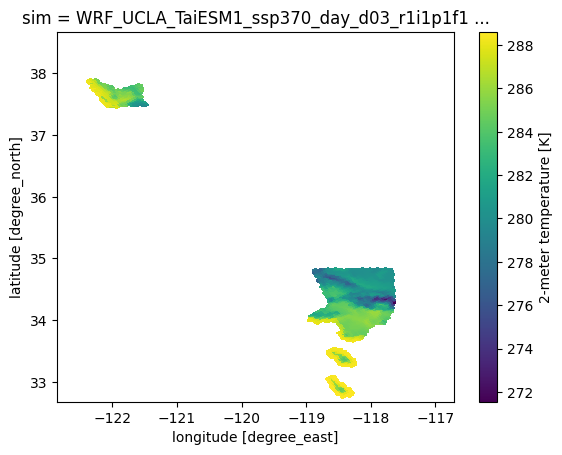

In [21]:
clip_counties = (cd
    .catalog("cadcat")
    .activity_id("WRF")
    .institution_id("UCLA")
    .table_id("day")
    .grid_label("d03")
    .variable("t2") # Temperature at 2 meters
    .processes({
        "warming_level": {
            "warming_levels": [1.5, 2.0, 3.0], # Warming levels in °C
        },
        "clip": ["Alameda County", "Los Angeles County"]
    })
    .get()
)

clip_counties.isel(sim=0, warming_level=0, time_delta=0).t2.plot(x='lon', y='lat')

Now, we can separate the two clipped regions like we did before using the `separated: True` parameter to `clip`, and see that `county` now exists as a dimension on the resulting DataArray object.

In [22]:
clip_counties_separated = (cd
    .catalog("cadcat")
    .activity_id("WRF")
    .institution_id("UCLA")
    .table_id("day")
    .grid_label("d03")
    .variable("t2") # Temperature at 2 meters
    .processes({
        "warming_level": {
            "warming_levels": [1.5, 2.0, 3.0], # Warming levels in °C
        },
        "clip": {
            "boundaries": ["Alameda County", "Los Angeles County"],
            "separated": True
        }
    })
    .get()
)

clip_counties_separated

2026-01-02 23:12:56 - climakitae.new_core.processors.filter_unadjusted_models - WARNING - 

Your query selected models that do not have a-priori bias adjustment. 
These models have been removed from the returned query. 
To include them, please add the following processor to your query: 
ClimateData().processes('filter_unadjusted_models': 'no')



<xarray.Dataset> Size: 8GB
Dimensions:            (county: 2, sim: 5, warming_level: 3, time_delta: 10950,
                        y: 100, x: 64)
Coordinates:
  * county             (county) <U18 144B 'Alameda County' 'Los Angeles County'
  * sim                (sim) object 40B 'WRF_UCLA_EC-Earth3_ssp370_day_d03_r1...
  * warming_level      (warming_level) float64 24B 1.5 2.0 3.0
  * time_delta         (time_delta) int64 88kB -5475 -5474 -5473 ... 5473 5474
  * y                  (y) float64 800B 7.369e+05 7.399e+05 ... 1.4e+06
  * x                  (x) float64 512B -4.215e+06 -4.212e+06 ... -4.026e+06
    lakemask           (county, y, x) float32 51kB nan nan nan ... nan nan nan
    landmask           (county, y, x) float32 51kB nan nan nan ... nan nan nan
    lat                (county, y, x) float32 51kB nan nan nan ... nan nan nan
    lon                (county, y, x) float32 51kB nan nan nan ... nan nan nan
    centered_year      (sim, warming_level) float64 120B 2.018e+03 ... 2.083e+03
    Lambert_Conformal  int64 8B 0
Data variables:
    t2                 (county, sim, warming_level, time_delta, y, x) float32 8GB dask.array<chunksize=(1, 1, 1, 3652, 28, 2), meta=np.ndarray>
Attributes: (12/120)
    AERCU_FCT:                        1.0
    AERCU_OPT:                        0
    AUTO_LEVELS_OPT:                  2
    BL_PBL_PHYSICS:                   1
    BOTTOM-TOP_GRID_DIMENSION:        40
    BOTTOM-TOP_PATCH_END_STAG:        40
    ...                               ...
    warming_level:                    {'warming_levels': [1.5, 2.0, 3.0]}
    clip:                             Process 'clip' applied to the data. Sep...
    update_attributes:                Process 'update_attributes' applied to ...
    filter_unadjusted_models:         yes
    concat:                           Process 'concat' applied to the data. T...
    warming_level_simple:             Process 'warming_level_simple' applied ...

### Processor Example 6: Unit Conversion

We can also pass in a processor to convert the units of our dataset. It's as simple as specifying the conversion you'd like to apply. If it fails, you'll be informed in the logs about available units to convert to and no unit conversion will be applied.

In [23]:
# Here, we'll take the temperature data that's natively in Kelvin to be returned in Fahrenheit instead
degF_data = (cd
    .catalog("cadcat")
    .activity_id("WRF")
    .institution_id("UCLA")
    .table_id("day")
    .grid_label("d03")
    .variable("t2") # Temperature at 2 meters
    .processes({
        "warming_level": {
            "warming_levels": [1.5, 2.0, 3.0], # Warming levels in °C
        },
        "clip": "Los Angeles County",
        "convert_units": "degF" # This will convert from Kelvin to Fahrenheit
    })
    .get()
)
degF_data

2026-01-02 23:13:03 - climakitae.new_core.processors.filter_unadjusted_models - WARNING - 

Your query selected models that do not have a-priori bias adjustment. 
These models have been removed from the returned query. 
To include them, please add the following processor to your query: 
ClimateData().processes('filter_unadjusted_models': 'no')



<xarray.Dataset> Size: 3GB
Dimensions:            (sim: 5, warming_level: 3, y: 72, x: 64,
                        time_delta: 10950)
Coordinates:
  * sim                (sim) object 40B 'WRF_UCLA_EC-Earth3_ssp370_day_d03_r1...
  * warming_level      (warming_level) float64 24B 1.5 2.0 3.0
  * y                  (y) float64 576B 7.369e+05 7.399e+05 ... 9.499e+05
  * x                  (x) float64 512B -4.215e+06 -4.212e+06 ... -4.026e+06
  * time_delta         (time_delta) int64 88kB -5475 -5474 -5473 ... 5473 5474
    lakemask           (y, x) float32 18kB dask.array<chunksize=(72, 2), meta=np.ndarray>
    landmask           (y, x) float32 18kB dask.array<chunksize=(72, 2), meta=np.ndarray>
    lat                (y, x) float32 18kB dask.array<chunksize=(72, 2), meta=np.ndarray>
    lon                (y, x) float32 18kB dask.array<chunksize=(72, 2), meta=np.ndarray>
    centered_year      (sim, warming_level) float64 120B 2.018e+03 ... 2.083e+03
    Lambert_Conformal  int64 8B 0
Data variables:
    t2                 (sim, warming_level, time_delta, y, x) float32 3GB dask.array<chunksize=(1, 1, 3652, 44, 2), meta=np.ndarray>
Attributes: (12/121)
    AERCU_FCT:                        1.0
    AERCU_OPT:                        0
    AUTO_LEVELS_OPT:                  2
    BL_PBL_PHYSICS:                   1
    BOTTOM-TOP_GRID_DIMENSION:        40
    BOTTOM-TOP_PATCH_END_STAG:        40
    ...                               ...
    clip:                             Process 'clip' applied to the data. Cli...
    convert_units:                    Process 'convert_units' applied to the ...
    update_attributes:                Process 'update_attributes' applied to ...
    filter_unadjusted_models:         yes
    concat:                           Process 'concat' applied to the data. T...
    warming_level_simple:             Process 'warming_level_simple' applied ...

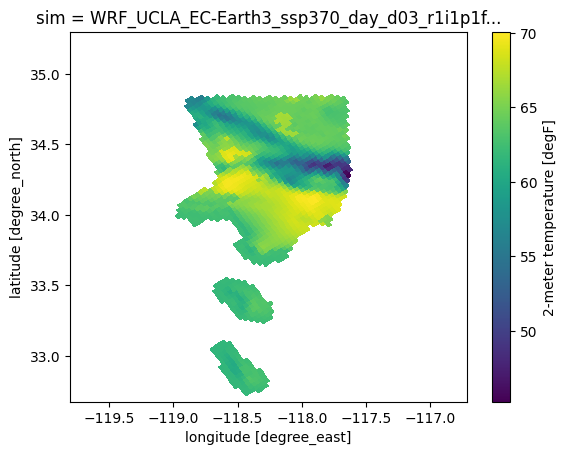

In [24]:
# Here we'll see that the values are within the reasonable ranges of we'd see for Fahrenheit for Los Angeles County
degF_data.mean(dim='time_delta').isel(sim=0, warming_level=0).t2.plot(x="lon", y="lat")

### Processor Example 7: Metric Calculation

Some basic metric calculations have also been built in as processors, so that you can save yourself a few steps of calculating common metrics on your resulting dataset.

The basic options include: `min`, `mean`, `median`, `max`, and `percentiles` and are demonstrated below. 

1-in-X calculations have also been included in as a more complex metric calculation for this processor.

#### Simple Metric Comparison Across Warming Levels

Let's start with a simple metric comparison. We'll evaluate the min, mean, and max across three global warming levels, and then plot all those in a matrix. 

In [25]:
metrics = ['min', 'mean', 'max']
data = []
for metric in metrics:
    data.append(
        (cd.catalog("cadcat")
        .activity_id("WRF")
        .institution_id("UCLA")
        .table_id("day")
        .grid_label("d03")
        .variable("t2")
        .processes({
            "warming_level": {
                "warming_levels": [1.5, 2.0, 3.0],
            },
            "clip": "Humboldt County",
            "convert_units": "degF",
            "metric_calc": {
                "metric": metric,
                # NOTE: We have a `time_delta` dimension here because that's the time variable that's returned from a warming
                # level approach of retrieving data. If this was a time-based approach, that dimension would be named `time`.
                "dim": ["time_delta", "sim"]
                # note: don't average over warming level
            }
        })
        .get())
    )

2026-01-02 23:13:15 - climakitae.new_core.processors.filter_unadjusted_models - WARNING - 

Your query selected models that do not have a-priori bias adjustment. 
These models have been removed from the returned query. 
To include them, please add the following processor to your query: 
ClimateData().processes('filter_unadjusted_models': 'no')

2026-01-02 23:13:21 - climakitae.new_core.processors.filter_unadjusted_models - WARNING - 

Your query selected models that do not have a-priori bias adjustment. 
These models have been removed from the returned query. 
To include them, please add the following processor to your query: 
ClimateData().processes('filter_unadjusted_models': 'no')

2026-01-02 23:13:26 - climakitae.new_core.processors.filter_unadjusted_models - WARNING - 

Your query selected models that do not have a-priori bias adjustment. 
These models have been removed from the returned query. 
To include them, please add the following processor to your query: 
ClimateData().proc

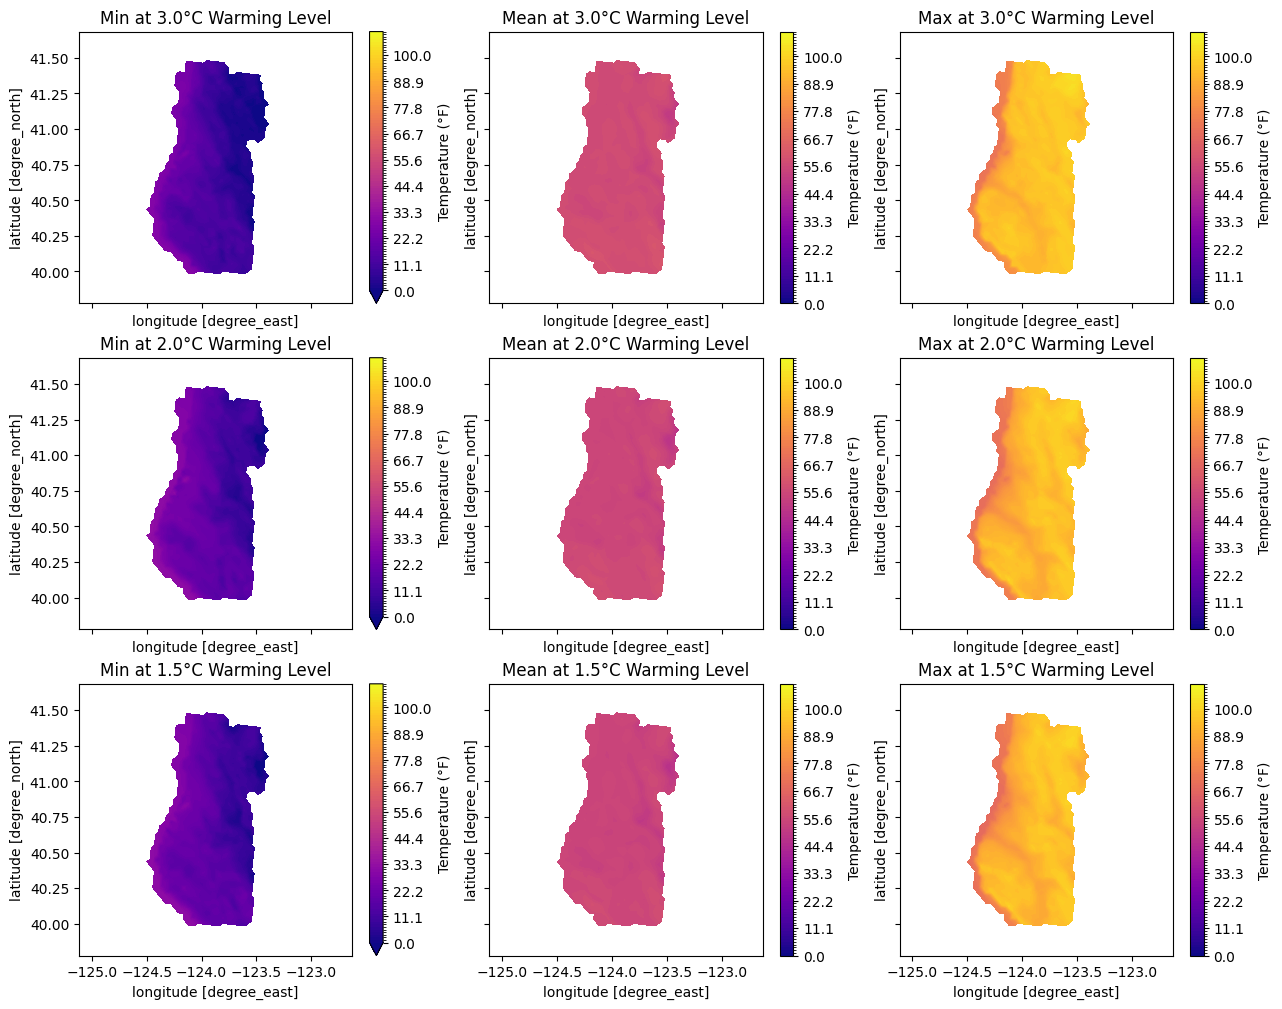

In [26]:
# Taking a look at the 3 warming levels
fig, axes = plt.subplots(3, 3, figsize=(15, 12), sharex=True, sharey=True)

gwls = [1.5, 2.0, 3.0][::-1]  # Reverse for plotting
for i, metric in enumerate(metrics):
    for j, gwl in enumerate(gwls):
        ax = axes[j, i]
        data[i].isel(warming_level=len(gwls) - 1 - j).t2.plot.contourf(
            ax=ax,
            y="lat",
            x="lon",
            cbar_kwargs={
                'label': 'Temperature (°F)',
            }, 
            levels=100,
            cmap='plasma',
            vmin=0,
            vmax=110
        )
        ax.set_title(f'{metric.capitalize()} at {gwl}°C Warming Level')
        
plt.show()

#### Advanced Metric Comparison Across Warming Levels

Now, let's try a slightly more advanced analysis. Let's defined a base level of warming of 1.2°C as our reference period, and then calculate the 90th, 95th, and 98th percentile temperatures within this reference period. 

Then, we'll get the temperature for three global warming levels (1.5, 2.0, 3.0) and count the average number of days per year above the 90th, 95th, and 98th percentile reference period temperature for each warming level for each individual GCM. Then we'll average the number of days across GCMs and plot the results in a matrix.

In [27]:
# Let's first find the 90th, 95th, and 98th percentiles over Humboldt County for a 1.2°C reference warming level period.
percentiles = [90, 95, 98]
location = "Humboldt County"
ref_percentiles = (
    cd.catalog("cadcat")
    .activity_id("WRF")
    .institution_id("UCLA")
    .table_id("day")
    .grid_label("d03")
    .variable("t2")
    .processes({
        "warming_level": {
            "warming_levels": [1.2],
        },
        "clip": location,
        "convert_units": "degF",
        "metric_calc": {
            "percentiles": percentiles,
            "dim": ["time_delta"]
        }
    })
    .get()
)

2026-01-02 23:16:00 - climakitae.new_core.processors.filter_unadjusted_models - WARNING - 

Your query selected models that do not have a-priori bias adjustment. 
These models have been removed from the returned query. 
To include them, please add the following processor to your query: 
ClimateData().processes('filter_unadjusted_models': 'no')

2026-01-02 23:16:01 - climakitae.new_core.processors.warming_level - WARNING - 

Incomplete warming level for WRF.UCLA.EC-Earth3-Veg.ssp370.day.d03.r1i1p1f1 at 1.2C. 
Skipping this warming level.
2026-01-02 23:16:01 - climakitae.new_core.processors.warming_level - WARNING - No valid slices found for WRF.UCLA.EC-Earth3-Veg.ssp370.day.d03.r1i1p1f1. Ensure the warming level times table is correctly configured.


In [28]:
# Now, we'll get all the raw data from the future WLs and count the number of days each simulation is above the different 1.2°C WL percentiles.
wrf_wl_data = (
    cd.catalog("cadcat")
    .activity_id("WRF")
    .institution_id("UCLA")
    .table_id("day")
    .grid_label("d03")
    .variable("t2")
    .processes({
        "warming_level": {
            "warming_levels": [1.5, 2.0, 3.0],
        },
        "clip": location,
        "convert_units": "degF",
    })
    .get()
)

2026-01-02 23:16:05 - climakitae.new_core.processors.filter_unadjusted_models - WARNING - 

Your query selected models that do not have a-priori bias adjustment. 
These models have been removed from the returned query. 
To include them, please add the following processor to your query: 
ClimateData().processes('filter_unadjusted_models': 'no')



In [29]:
display(ref_percentiles)
display(wrf_wl_data)

<xarray.Dataset> Size: 314kB
Dimensions:            (sim: 4, warming_level: 1, y: 52, x: 47)
Coordinates:
  * sim                (sim) object 32B 'WRF_UCLA_EC-Earth3_ssp370_day_d03_r1...
  * warming_level      (warming_level) float64 8B 1.2
  * y                  (y) float64 416B 1.643e+06 1.646e+06 ... 1.796e+06
  * x                  (x) float64 376B -4.143e+06 -4.14e+06 ... -4.005e+06
    lakemask           (y, x) float32 10kB dask.array<chunksize=(39, 20), meta=np.ndarray>
    landmask           (y, x) float32 10kB dask.array<chunksize=(39, 20), meta=np.ndarray>
    lat                (y, x) float32 10kB dask.array<chunksize=(39, 20), meta=np.ndarray>
    lon                (y, x) float32 10kB dask.array<chunksize=(39, 20), meta=np.ndarray>
    centered_year      (sim, warming_level) float64 32B 2.01e+03 ... 2.029e+03
    Lambert_Conformal  int64 8B 0
Data variables:
    t2_p90             (sim, warming_level, y, x) float64 78kB dask.array<chunksize=(2, 1, 39, 20), meta=np.ndarray>
    t2_p95             (sim, warming_level, y, x) float64 78kB dask.array<chunksize=(2, 1, 39, 20), meta=np.ndarray>
    t2_p98             (sim, warming_level, y, x) float64 78kB dask.array<chunksize=(2, 1, 39, 20), meta=np.ndarray>
    t2_mean            (sim, warming_level, y, x) float32 39kB dask.array<chunksize=(1, 1, 18, 2), meta=np.ndarray>
Attributes: (12/122)
    AERCU_FCT:                        1.0
    AERCU_OPT:                        0
    AUTO_LEVELS_OPT:                  2
    BL_PBL_PHYSICS:                   1
    BOTTOM-TOP_GRID_DIMENSION:        40
    BOTTOM-TOP_PATCH_END_STAG:        40
    ...                               ...
    convert_units:                    Process 'convert_units' applied to the ...
    metric_calc:                      Process 'metric_calc' applied to the da...
    update_attributes:                Process 'update_attributes' applied to ...
    filter_unadjusted_models:         yes
    concat:                           Process 'concat' applied to the data. T...
    warming_level_simple:             Process 'warming_level_simple' applied ...

<xarray.Dataset> Size: 2GB
Dimensions:            (sim: 5, warming_level: 3, y: 52, x: 47,
                        time_delta: 10950)
Coordinates:
  * sim                (sim) object 40B 'WRF_UCLA_EC-Earth3_ssp370_day_d03_r1...
  * warming_level      (warming_level) float64 24B 1.5 2.0 3.0
  * y                  (y) float64 416B 1.643e+06 1.646e+06 ... 1.796e+06
  * x                  (x) float64 376B -4.143e+06 -4.14e+06 ... -4.005e+06
  * time_delta         (time_delta) int64 88kB -5475 -5474 -5473 ... 5473 5474
    lakemask           (y, x) float32 10kB dask.array<chunksize=(39, 20), meta=np.ndarray>
    landmask           (y, x) float32 10kB dask.array<chunksize=(39, 20), meta=np.ndarray>
    lat                (y, x) float32 10kB dask.array<chunksize=(39, 20), meta=np.ndarray>
    lon                (y, x) float32 10kB dask.array<chunksize=(39, 20), meta=np.ndarray>
    centered_year      (sim, warming_level) float64 120B 2.018e+03 ... 2.083e+03
    Lambert_Conformal  int64 8B 0
Data variables:
    t2                 (sim, warming_level, time_delta, y, x) float32 2GB dask.array<chunksize=(1, 1, 3652, 18, 2), meta=np.ndarray>
Attributes: (12/121)
    AERCU_FCT:                        1.0
    AERCU_OPT:                        0
    AUTO_LEVELS_OPT:                  2
    BL_PBL_PHYSICS:                   1
    BOTTOM-TOP_GRID_DIMENSION:        40
    BOTTOM-TOP_PATCH_END_STAG:        40
    ...                               ...
    clip:                             Process 'clip' applied to the data. Cli...
    convert_units:                    Process 'convert_units' applied to the ...
    update_attributes:                Process 'update_attributes' applied to ...
    filter_unadjusted_models:         yes
    concat:                           Process 'concat' applied to the data. T...
    warming_level_simple:             Process 'warming_level_simple' applied ...

First, we'll drop `EC-Earth3-Veg` from `wrf_wl_data`. This simulation reaches 1.2°C. of warming before a full warming-level (WL) slice can be constructed. Because the WRF dataset spans from 1981-2100 and we are querying for WL slices full of 30 years of data, any simulation that reaches a target before 1996 or after 2085 is excluded due to incomplete data. In this case, `EC-Earth3-Veg` reaches 1.2 °C in 1995, resulting in insufficient data to form a complete WL slice, so it's dropped from the resulting Dataset.

In [30]:
# Dropping `EC-Earth3-Veg` by only keeping the other sims
only_valid_wrf = wrf_wl_data.sel(sim=[
    'WRF_UCLA_TaiESM1_ssp370_day_d03_r1i1p1f1',
    # 'WRF_UCLA_EC-Earth3-Veg_ssp370_day_d03_r1i1p1f1',
    'WRF_UCLA_MIROC6_ssp370_day_d03_r1i1p1f1',
    'WRF_UCLA_EC-Earth3_ssp370_day_d03_r1i1p1f1',
    'WRF_UCLA_MPI-ESM1-2-HR_ssp370_day_d03_r3i1p1f1'
])

# Creating a DataArray from the reference percentiles
ref_percentile_da = ref_percentiles[["t2_p90", "t2_p95", "t2_p98"]].isel(warming_level=0).to_array(dim="percentiles").assign_coords(percentiles=percentiles)

# Comparing the temperature values to the percentiles
compared_da = (only_valid_wrf > ref_percentile_da).t2

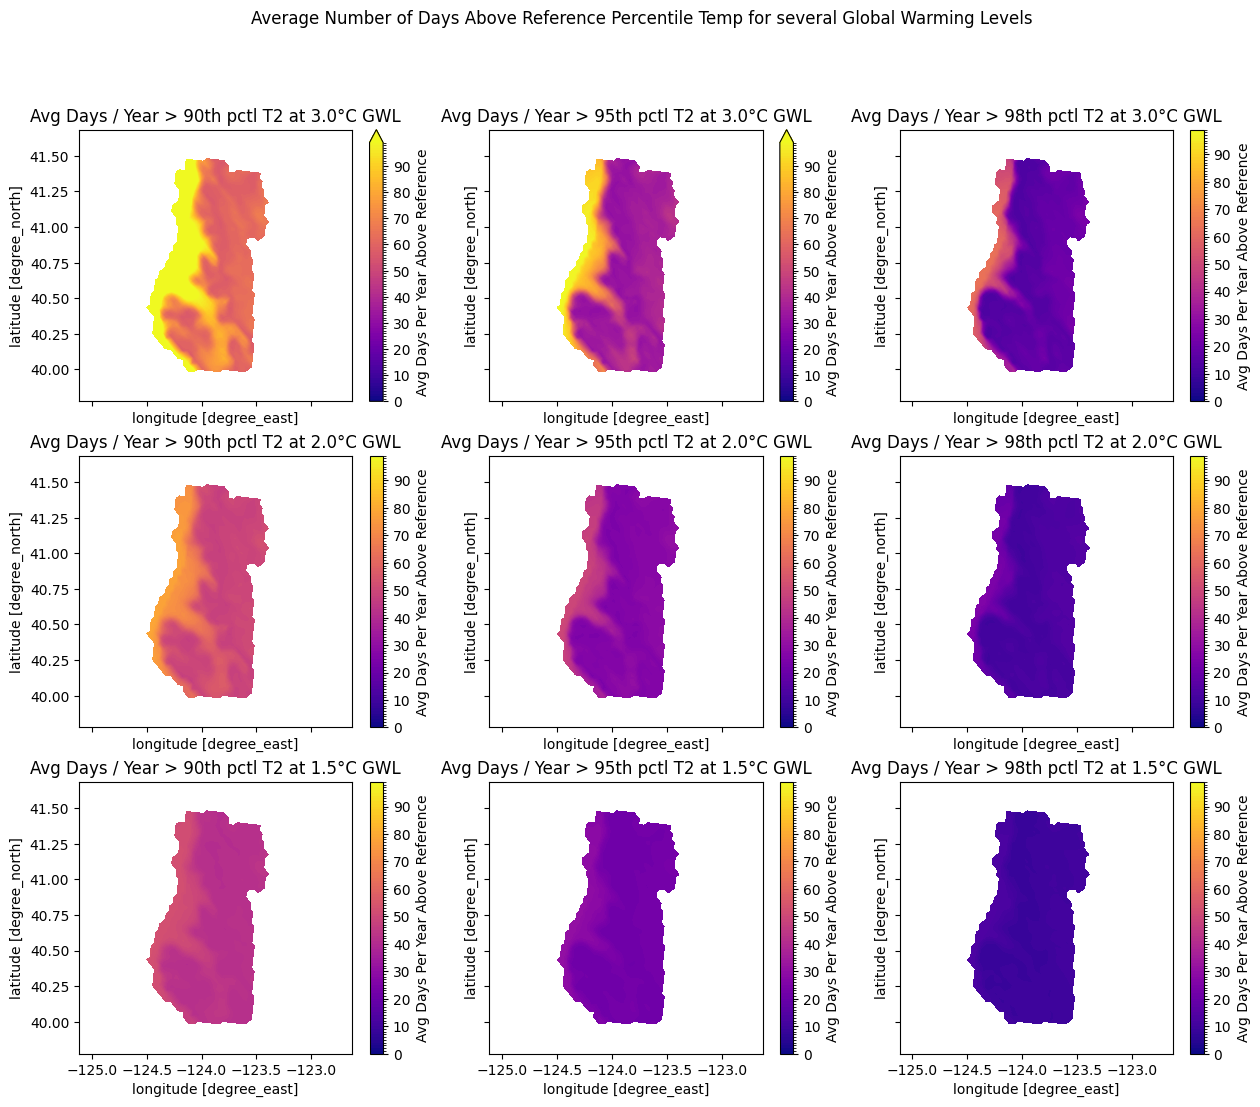

In [31]:
### Now, let's plot a comparison of the results

fig, axes = plt.subplots(3, 3, figsize=(15, 12), sharex=True, sharey=True)

# mask for the spatial coordinates so that we can preserve them after counting
spatial_mask = ref_percentile_da.isel(percentiles=0, sim=0).notnull()

gwls = [1.5, 2.0, 3.0][::-1]  # Reverse for plotting
for i, metric in enumerate(percentiles):
    for j, gwl in enumerate(gwls):
        ax = axes[j, i]
        
        days_exceeding = (compared_da.isel(warming_level=len(gwls) - 1 - j).sel(percentiles=metric).mean(dim='sim')).sum(dim='time_delta', skipna=False) / 30

        # preserve the masked county
        days_exceeding = days_exceeding.where(spatial_mask)

        # contour plot
        days_exceeding.plot.contourf(
            ax=ax,
            y="lat",
            x="lon",
            cbar_kwargs={'label': 'Avg Days Per Year Above Reference'},
            levels=100,
            cmap='plasma',
            vmin=0, vmax=99
        )
        ax.set_title(f'Avg Days / Year > {metric}th pctl T2 at {gwl}°C GWL')

plt.suptitle("Average Number of Days Above Reference Percentile Temp for several Global Warming Levels")
plt.show()

#### 1-in-X Metric Calculations

Finally, the last metric calculation that we provide out-of-the-box with the `ClimateData` object are 1-in-X calculations. Below demonstrates an example of how you could calculate the **Maximum 1-in-10 and 1-in-50 Daily Air Temperatures for WRF data over Alameda County for a 1.5°C warming world.**

**Parameter options for 1-in-X calculations:**
- `return_periods`: A list of return periods you're interested in calculating for your dataset
- `distribution`: One of the following distribution types: `["gev", "gumbel", "weibull", "pearson3", "genpareto", "gamma"]` (see more on scipy.stats documentation <a href="https://docs.scipy.org/doc/scipy/reference/stats.html#continuous-distributions" style="color: blue;" target="_blank">here</a>).
- `extremes_type`: `min` or `max`
- `event_duration`: (# of time, scale of time), i.e. `(1, 'day')`
- `block_size`: Block size in number of years, default is 1
- `goodness_of_fit_test`:  # Whether or not you want to see the p-values from the fitted distributions used to calculate the resulting 1-in-X return values, default is True.

2026-01-02 23:19:08 - climakitae.new_core.processors.filter_unadjusted_models - WARNING - 

Your query selected models that do not have a-priori bias adjustment. 
These models have been removed from the returned query. 
To include them, please add the following processor to your query: 
ClimateData().processes('filter_unadjusted_models': 'no')



Processing batches:   0%|          | 0/1 [00:00<?, ?it/s]

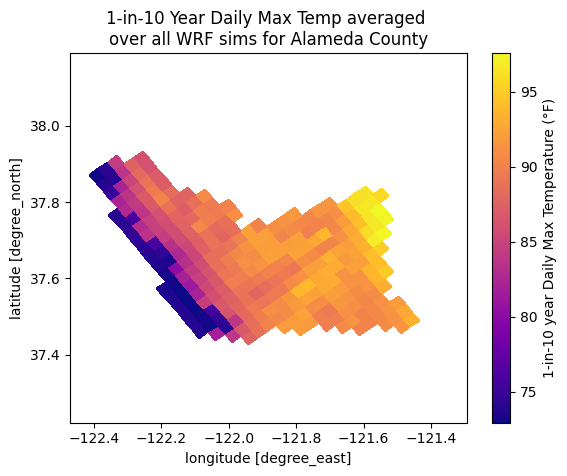

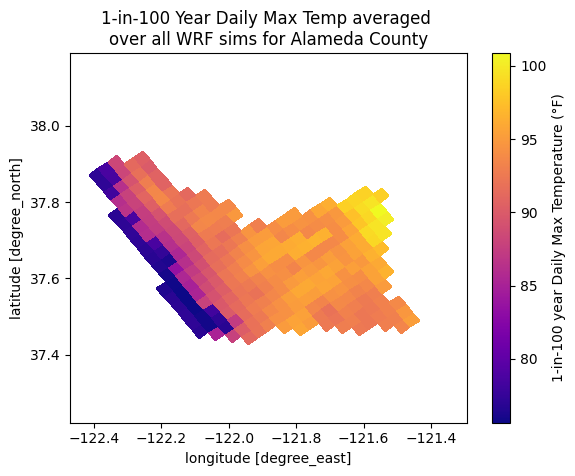

In [32]:
return_periods = [10, 100]
one_in_x_data = (cd
    .catalog("cadcat")
    .activity_id("WRF")
    .institution_id("UCLA")
    .table_id("day")
    .grid_label("d03")
    .variable("t2")
    .processes({
        "warming_level": {
            "warming_levels": [2.0]
        },
        "clip": "Alameda County", 
        "convert_units": "degF",
        "metric_calc": {
            "one_in_x": {
                "return_periods": return_periods, # Looking at 1-in-10 and 1-in-100
            }
        }
    })
    .get())

# Let's plot what the 1-in-X return values look like over Alameda County
for x in return_periods:
    fig,ax = plt.subplots()
    one_in_x_data.mean(dim='sim').sel(one_in_x=x).return_values.plot(
        cmap='plasma', 
        x='lon', 
        y='lat',
        cbar_kwargs={'label': f'1-in-{x} year Daily Max Temperature (°F)'}
    )
    ax.set_title(f'1-in-{x} Year Daily Max Temp averaged \nover all WRF sims for Alameda County')
    plt.show()

### Processor Example 9: Bias Adjust Model to Station

In case you want to station bias correct gridded climate model data to historical observations from weather stations, you can pass in your desired weather station to the `bias_adjust_model_to_station` processor that we provide:

In [33]:
# Let's manually bias adjust our climate data to KSAC (the SAC airport weather station).
manual_bias_adjustment = (cd
    .catalog("cadcat")
    .activity_id("WRF")
    .institution_id("UCLA")
    .table_id("1hr")
    .grid_label("d02")
    .variable("t2")
    .processes({
        "bias_adjust_model_to_station": {
            "stations": ['KSAC'],
            "historical_slice": (1980, 2014), # You can specify what historical period to bias correct for.
        }
    })
    .get()
)

manual_bias_adjustment

2026-01-02 23:21:22 - climakitae.new_core.processors.filter_unadjusted_models - WARNING - 

Your query selected models that do not have a-priori bias adjustment. 
These models have been removed from the returned query. 
To include them, please add the following processor to your query: 
ClimateData().processes('filter_unadjusted_models': 'no')



<xarray.Dataset> Size: 50MB
Dimensions:                              (sim: 5, time: 1051200)
Coordinates:
  * sim                                  (sim) object 40B 'wrf_ucla_ec-earth3...
  * time                                 (time) datetime64[ns] 8MB 1980-09-01...
Data variables:
    Sacramento Executive Airport (KSAC)  (sim, time) float64 42MB dask.array<chunksize=(1, 1051200), meta=np.ndarray>
Attributes: (12/121)
    description:                      temp at 2 m
    grid_mapping:                     Lambert_Conformal
    units:                            K
    AERCU_FCT:                        1.0
    AERCU_OPT:                        0
    AUTO_LEVELS_OPT:                  2
    ...                               ...
    history:                          [2026-01-02 23:22:31] : Bias-adjusted w...
    bias_adjustment:                  QuantileDeltaMapping(group=Grouper(name...
    bias_adjust_model_to_station:     {'stations': ['KSAC'], 'historical_slic...
    update_attributes:                Process 'update_attributes' applied to ...
    filter_unadjusted_models:         yes
    concat:                           Process 'concat' applied to the data. T...

### Processor Example 10: Export

Now that we’ve walked through the processors above, you want want to export the data to your local machine. The `export` processor makes this straightforward.

In the example below, we take a small subset of data, apply a few processors, and then export the result using the following parameters:

        filename (str, optional): Base output filename without extension.
            Default: "dataexport"
        file_format (str, optional): Output file format. Supported values:
            "NetCDF", "Zarr", "CSV". Case-insensitive. Default: "NetCDF"
        mode (str, optional): Storage location for Zarr files.
            "local" saves to local filesystem, "s3" saves to AWS S3.
            Default: "local"
        separated (bool, optional): When exporting a collection of point datasets,
            whether to create separate files for each point. If True, each dataset
            gets its own file with either lat/lon or index suffix. If False, all
            items are exported with the base filename (unique suffixes added if needed).
            Ignored for single gridded datasets. Default: False
        location_based_naming (bool, optional): When separated=True and
            exporting point-based data, include lat/lon coordinates in filenames
            (e.g., filename_34-0N_118-0W.nc). If False, uses index numbers
            instead (e.g., filename_0.nc). Silently ignored for gridded datasets.
            Default: False
        export_method (str, optional): Controls what data to export. Options:
            "data": Export all provided data (default)
            "raw": Export only raw/unprocessed data
            "calculate": Export only calculated/processed data
            "both": Export both raw and calculated data to separate files
            "skip_existing": Skip export if file already exists
            "none": Skip export entirely
            Default: "data"
        raw_filename (str, optional): Custom filename for raw data when using
            export_method="raw" or "both". If not provided, uses
            "{filename}_raw". Default: None
        calc_filename (str, optional): Custom filename for calculated data when
            using export_method="calculate" or "both". If not provided, uses
            "{filename}_calc".
            Default: None
        filename_template (str, optional): Custom template for generating filenames.
            Supports placeholders: {filename}, {lat}, {lon}, {name}.
            Lat/lon placeholders only populated for single-point data.
            Example: "{name}_data_{lat}N_{lon}W".
            Default: None
        fail_on_error (bool, optional): If True, raise exceptions on export
            errors. If False, log warnings and continue.
            Default: True

In [34]:
# Let's export all of Humboldt County's data into one file
location = "Humboldt County"
export_data = (
    cd.catalog("cadcat")
    .activity_id("WRF")
    .institution_id("UCLA")
    .table_id("mon")
    .grid_label("d03")
    .variable("t2")
    .processes({
        "warming_level": {
            "warming_levels": [1.2],
        },
        "clip": location,
        "convert_units": "degF",
        "export": {
            "filename": "gridded_export_data", # Filename that you want the data exported to
            "file_format": "NetCDF" # File format - default is `NetCDF`, other options are `NetCDF`, `Zarr`, and `CSV`
        }
    })
    .get()
)

2026-01-02 23:22:40 - climakitae.new_core.processors.filter_unadjusted_models - WARNING - 

Your query selected models that do not have a-priori bias adjustment. 
These models have been removed from the returned query. 
To include them, please add the following processor to your query: 
ClimateData().processes('filter_unadjusted_models': 'no')

2026-01-02 23:22:41 - climakitae.new_core.processors.warming_level - WARNING - 

Incomplete warming level for WRF.UCLA.EC-Earth3-Veg.ssp370.mon.d03.r1i1p1f1 at 1.2C. 
Skipping this warming level.
2026-01-02 23:22:41 - climakitae.new_core.processors.warming_level - WARNING - No valid slices found for WRF.UCLA.EC-Earth3-Veg.ssp370.mon.d03.r1i1p1f1. Ensure the warming level times table is correctly configured.
Exporting specified data to NetCDF...
Saving file locally as NetCDF4...
Saved! You can find your file in the panel to the left and download to your local machine from there.


In [35]:
lat_lons = [
    (34.05, -118.25),  # Los Angeles, CA
    (37.77, -122.42),  # San Francisco, CA
]

In [36]:
# Now, let's export this list of `lat_lons` from before into separate files.
export_data = (
    cd.catalog("cadcat")
    .activity_id("WRF")
    .institution_id("UCLA")
    .table_id("mon")
    .grid_label("d03")
    .variable("t2")
    .processes({
        "warming_level": {
            "warming_levels": [1.2],
        },
        "clip": {
            "points": lat_lons,
            "separated": True,
        },
        "convert_units": "degF",
        "export": {
            "separated": True, # Whether or not you want different shapes (i.e. points, counties) to be separated into different files
            "location_based_naming": True, # Whether or not you want the lat/lons of different points passed 
            "filename": "point_export_data", # Filename that you want the data exported to
        }
    })
    .get()
)

2026-01-02 23:22:47 - climakitae.new_core.processors.filter_unadjusted_models - WARNING - 

Your query selected models that do not have a-priori bias adjustment. 
These models have been removed from the returned query. 
To include them, please add the following processor to your query: 
ClimateData().processes('filter_unadjusted_models': 'no')

2026-01-02 23:22:48 - climakitae.new_core.processors.warming_level - WARNING - 

Incomplete warming level for WRF.UCLA.EC-Earth3-Veg.ssp370.mon.d03.r1i1p1f1 at 1.2C. 
Skipping this warming level.
2026-01-02 23:22:48 - climakitae.new_core.processors.warming_level - WARNING - No valid slices found for WRF.UCLA.EC-Earth3-Veg.ssp370.mon.d03.r1i1p1f1. Ensure the warming level times table is correctly configured.
Exporting specified data to NetCDF...
Saving file locally as NetCDF4...
Saved! You can find your file in the panel to the left and download to your local machine from there.
Exporting specified data to NetCDF...
Saving file locally as NetCDF4

## Conclusion

This notebook, together with `climakitae`, is intended to support and streamline your climate data analyses by providing practical examples and access to the datasets supported by Cal-Adapt: Analytics Engine, along with a suite of built-in data processors.

**Some key highlights that are accessible with `climakitae:`**
- Simplified access to a wide range of climate datasets
- Flexible configuration of variables, spatial and temporal resolutions, and locations.
- Built-in data transformations that reduce the need for manual pre-processing.
- Integrated climate and statistical processors designed to streamline your climate analyses.

We encourage you to explore these capabilities and experiment with different configurations to better understand how `climakitae` can support your analytical needs.

If you encounter any issues while running this notebook, experience unexpected behavior in any of the processors, or have feedback or feature requests related to the `ClimateData` object, please submit an issue on our GitHub repository:
https://github.com/cal-adapt/climakitae/issues.

Your feedback is very valuable to us and helps guide continued development and improvement of the library.